
# Adiabatic flame temperature including solid carbon formation

Adiabatic flame temperature and equilibrium composition for a fuel/air mixture
as a function of equivalence ratio, including formation of solid carbon.



In [1]:
import csv
import sys

import cantera as ct
import numpy as np

Edit these parameters to change the initial temperature, the pressure, and
the phases in the mixture.



In [2]:
T = 300.0
P = 101325.0

# phases
gas = ct.Solution("input/gri30_gasifier.yaml")
carbon = ct.Solution("graphite.yaml")

# List of species of interest
species_of_interest = ["CO2", "CO", "H2O", "H2", "OH", "H", "O2", "O", "NO", "N2", "N"]

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = "C:5.0, H:8.0, O:4.0, N:0.2, S:0.02"
# fuel_species = 'CH4'

# equivalence ratio range
phi_min = 0.3
phi_max = 3.5
npoints = 50
phi = np.linspace(phi_min, phi_max, npoints)
xeq_species = np.zeros(
    (len(species_of_interest), npoints)
)  # Mole fractions for species of interest
print(xeq_species)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(npoints)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi[i], fuel_species, "O2:1.0, N2:3.76")

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate("HP", solver="gibbs", max_steps=1000)

    tad[i] = mix.T
    print("At phi = {0:12.4g}, Tad = {1:12.4g}".format(phi[i], tad[i]))
    xeq[:, i] = mix.species_moles
    xeq_species[:, i] = [gas[m].X[0] for m in species_of_interest]

# write output CSV file for importing into Excel
csv_file = "adiabatic.csv"
with open(csv_file, "w", newline="") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["phi", "T (K)"] + mix.species_names)
    for i in range(npoints):
        writer.writerow([phi[i], tad[i]] + list(xeq[:, i]))
print("Output written to {0}".format(csv_file))

At phi =          0.3, Tad =         2842
At phi =       0.3653, Tad =         3023
At phi =       0.4306, Tad =         3161
At phi =       0.4959, Tad =         3275
At phi =       0.5612, Tad =         3373
At phi =       0.6265, Tad =         3460
At phi =       0.6918, Tad =         3540
At phi =       0.7571, Tad =         3616
At phi =       0.8224, Tad =         3689
At phi =       0.8878, Tad =         3761
At phi =       0.9531, Tad =         3834
At phi =        1.018, Tad =         3908
At phi =        1.084, Tad =         3985
At phi =        1.149, Tad =         4066
At phi =        1.214, Tad =         4151
At phi =         1.28, Tad =         4243
At phi =        1.345, Tad =         4340
At phi =         1.41, Tad =         4441
At phi =        1.476, Tad =         4545
At phi =        1.541, Tad =         4650
At phi =        1.606, Tad =         4753
At phi =        1.671, Tad =         4851
At phi =        1.737, Tad =         4943
At phi =        1.802, Tad =      

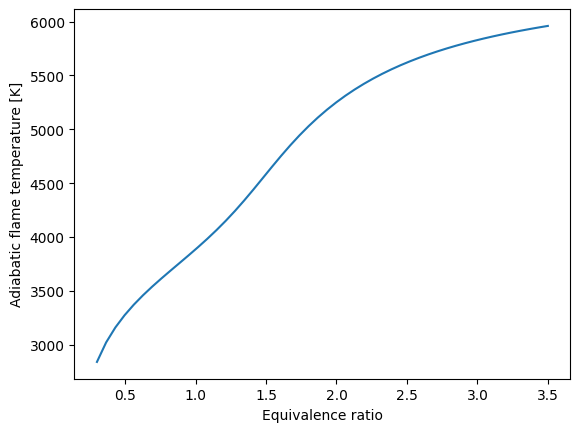

In [4]:
# if '--plot' in sys.argv:
import matplotlib.pyplot as plt

plt.plot(phi, tad)
plt.xlabel("Equivalence ratio")
plt.ylabel("Adiabatic flame temperature [K]")
plt.show()

In [5]:
print(mix.report())

************ Phase gri30 ************
Moles:  0.9069120304103754

  gri30:

       temperature   5959.4 K
          pressure   1.0132e+05 Pa
           density   0.03118 kg/m^3
  mean mol. weight   15.248 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        1.9322e+07        2.9462e+08  J
   internal energy        1.6073e+07        2.4507e+08  J
           entropy             16324         2.489e+05  J/K
    Gibbs function        -7.796e+07       -1.1887e+09  J
 heat capacity c_p            1641.5             25029  J/K
 heat capacity c_v            1096.2             16714  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         7.291e-05        0.00055144           -31.035
                 H          0.024151           0.36532           -15.518
    

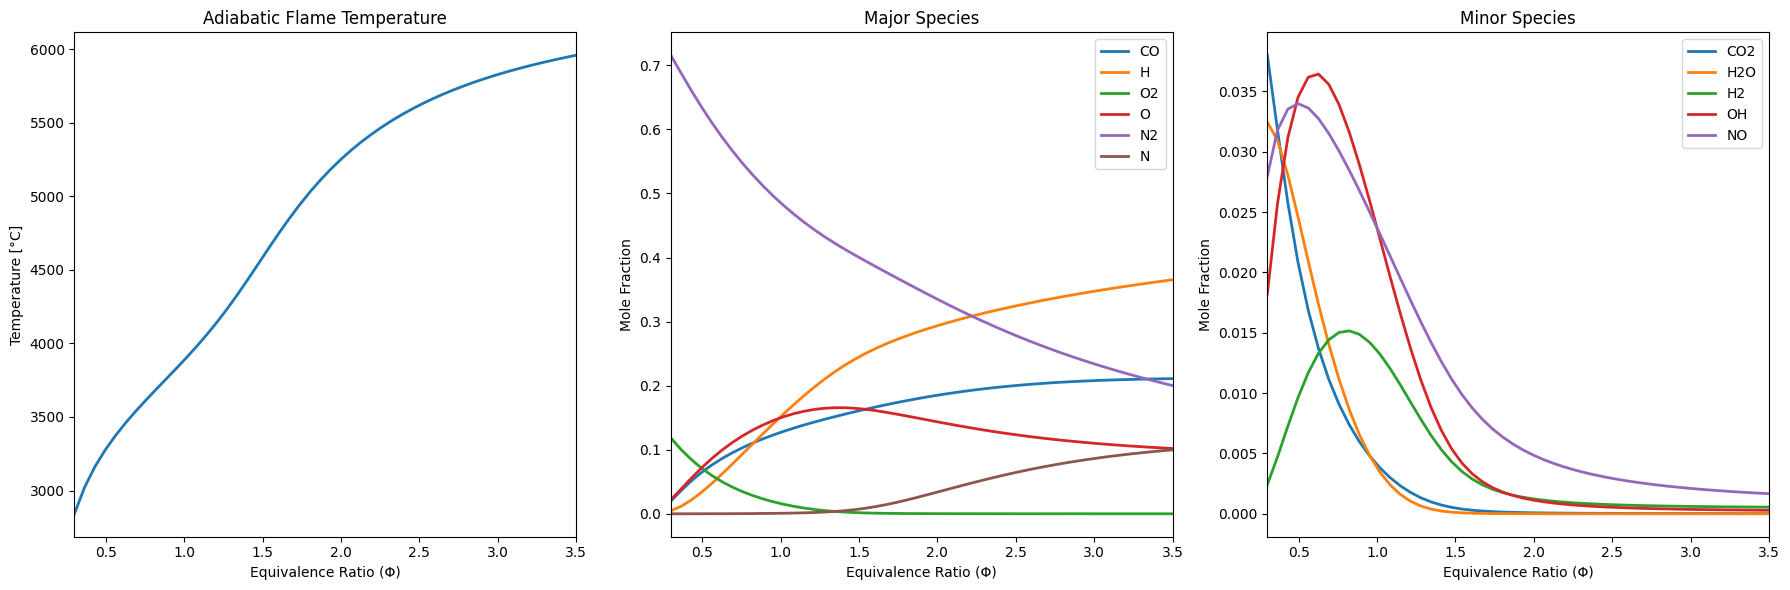

In [6]:
# --------------------------------------------------------------------------
# Plotting Results
# --------------------------------------------------------------------------
xlimit = 0.04  # Limit to distinguish major and minor species
plt.figure(figsize=(18, 6))

# Plot of temperature vs. equivalence ratio
plt.subplot(1, 3, 1)
plt.plot(phi, tad, linewidth=2)
plt.title("Adiabatic Flame Temperature")
plt.xlabel("Equivalence Ratio (Φ)")
plt.xlim([phi_min, phi_max])
plt.ylabel("Temperature [°C]")

# Plot of concentration of major species vs. equivalence ratio
plt.subplot(1, 3, 2)
for j, species in enumerate(species_of_interest):
    if np.max(xeq_species[j, :]) > xlimit:  # Major species
        plt.plot(phi, xeq_species[j, :], linewidth=2, label=species)
plt.legend()
plt.title("Major Species")
plt.xlabel("Equivalence Ratio (Φ)")
plt.xlim([phi_min, phi_max])
plt.ylabel("Mole Fraction")

# Plot of concentration of minor species vs. equivalence ratio
plt.subplot(1, 3, 3)
for j, species in enumerate(species_of_interest):
    if np.max(xeq_species[j, :]) <= xlimit:  # Minor species
        plt.plot(phi, xeq_species[j, :], linewidth=2, label=species)
plt.legend()
plt.title("Minor Species")
plt.xlabel("Equivalence Ratio (Φ)")
plt.xlim([phi_min, phi_max])
plt.ylabel("Mole Fraction")

plt.tight_layout()
plt.show()